In [1]:
from time import time
import logging
import pylab as pl
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA,RandomizedPCA
from sklearn.svm import SVC



In [8]:
try:
    print('lfw_people already installed')
    lfw_peeps = fetch_lfw_people('data', min_faces_per_person=70, resize=.4)
except:
    print('install lfw_people')
n_samples , h,w = lfw_peeps.images.shape
np.random.seed(42)
X = lfw_peeps.data #[:-1]?
n_features = X.shape[1]

y =  lfw_peeps.target
target_names = lfw_peeps.target_names
n_classes = target_names.shape[0]

print("TOTAL DATA SIZE:")
print("n_samples: {}".format(n_samples))
print("n_feats: {}".format(n_features))
print("n_classes: {}".format(n_classes))

lfw_people already installed
TOTAL DATA SIZE:
n_samples: 1288
n_feats: 1850
n_classes: 7


[[138.66667 147.33333 148.66667 ... 239.33333 247.66667 245.66667]]


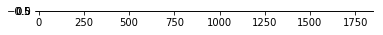

In [20]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25, random_state=42)
print(X_train[:1])
plt.imshow(X_train[:1])

In [28]:
n_comp = 150
print("Extracting the top %d eigenfaces from %d faces" % (n_comp, X_train.shape[0]))
import time
ti = time.time()
pca = PCA(n_components=n_comp, whiten=True, svd_solver='randomized')
pca = pca.fit(X_train)
print("done in %0.3fs" % (time.time()-ti))

Extracting the top 150 eigenfaces from 966 faces
done in 0.097s


In [30]:
eigen = pca.components_.reshape((n_comp,h,w))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time.time()-ti))

done in 117.637s


In [31]:
p_g = {"C":[1e3, 1e4, 1e5,5e3,5e5],
      "gamma":[.00001,.005,.001,.005,.01,.1]
      }

best_clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), p_g)
clf = best_clf.fit(X_train_pca,y_train)

print('BEST ESTIMATOR:', clf.best_estimator_)

BEST ESTIMATOR: SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [35]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test,y_pred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.53      0.62      0.57        13
     Colin Powell       0.75      0.87      0.81        60
  Donald Rumsfeld       0.72      0.78      0.75        27
    George W Bush       0.91      0.88      0.89       146
Gerhard Schroeder       0.83      0.76      0.79        25
      Hugo Chavez       0.67      0.53      0.59        15
       Tony Blair       0.88      0.81      0.84        36

      avg / total       0.83      0.82      0.82       322



In [37]:
cm = confusion_matrix(y_test,y_pred,labels=range(n_classes))
print(cm)

[[  8   0   3   2   0   0   0]
 [  1  52   2   3   0   1   1]
 [  4   0  21   1   0   1   0]
 [  1  12   1 128   3   1   0]
 [  0   1   0   3  19   1   1]
 [  0   2   0   2   1   8   2]
 [  1   2   2   2   0   0  29]]


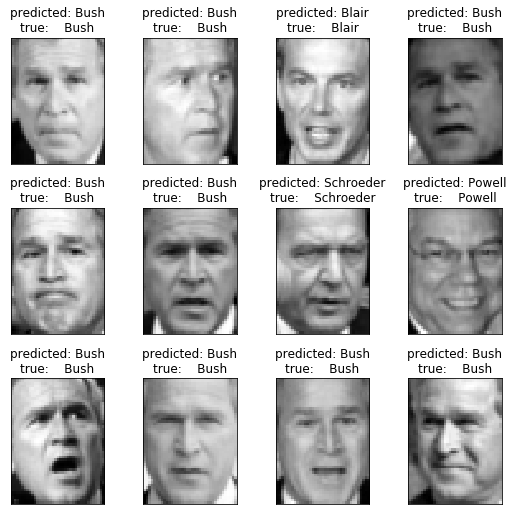

In [39]:
def plot_gallery(images,titles,h,w,n_row=3,n_col=4):
    pl.figure(figsize=(1.8*n_col,2.4*n_row))
    pl.subplots_adjust(bottom=0,left=.01,right=.99,top=.90,hspace=.35)
    for i in range(n_row*n_col):
        pl.subplot(n_row,n_col, i+1)
        pl.imshow(images[i].reshape((h,w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())
def title(y_pred,y_test,target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ',1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ',1)[-1]
    return ('predicted: %s\ntrue:    %s' % (pred_name, true_name))

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]
plot_gallery(X_test,prediction_titles,h,w)
pl.show()

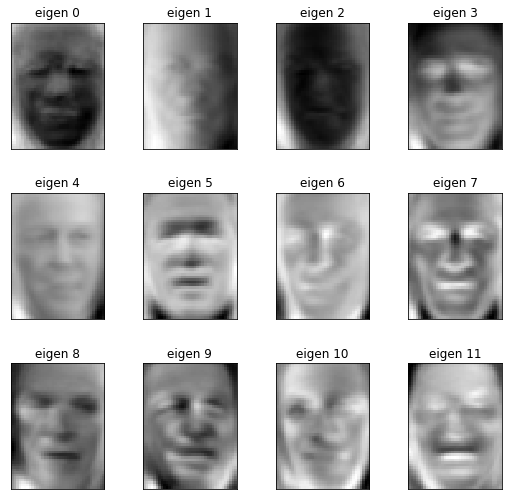

In [40]:
eigen_titles = ["eigen %d" % i for i in range(eigen.shape[0])]
plot_gallery(eigen,eigen_titles,h,w)

pl.show()